In [ ]:
import yfinance as yf
import pandas as pd


tickers = [
    'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA',
    'META', 'NVDA', 'BRK-B', 'JPM', 'V']

all_data = []

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'BRK-B', 'JPM', 'V']

In [9]:
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        df = stock.history(period="10y", interval="1d")
        df = df.reset_index()
        df.insert(0, 'Ticker', ticker)
        all_data.append(df)
        print(f"Data fetched successfully for {ticker}")
    except Exception as e:
        print(f"Error fetching data for {ticker}: {str(e)}")
combined_df = pd.concat(all_data, ignore_index=True)
column_order = ['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume']
combined_df = combined_df[column_order]
combined_df.to_csv('cleaned_stock_data.csv', index=False)
print("Data saved to cleaned_stock_data.csv")
print("\nSample of structured data:")
print(combined_df.head(3))
print("...")
print(combined_df.tail(3))

Data fetched successfully for AAPL
Data fetched successfully for MSFT
Data fetched successfully for GOOGL
Data fetched successfully for AMZN
Data fetched successfully for TSLA
Data fetched successfully for META
Data fetched successfully for NVDA
Data fetched successfully for BRK-B
Data fetched successfully for JPM
Data fetched successfully for V
Data saved to cleaned_stock_data.csv

Sample of structured data:
  Ticker                      Date       Open       High        Low  \
0   AAPL 2015-04-17 00:00:00-04:00  28.038789  28.170552  27.795361   
1   AAPL 2015-04-20 00:00:00-04:00  28.043259  28.612744  27.953928   
2   AAPL 2015-04-21 00:00:00-04:00  28.608280  28.630611  28.288920   

       Close     Volume  
0  27.860126  207828000  
1  28.496614  188217200  
2  28.342520  129740400  
...
      Ticker                      Date        Open        High         Low  \
25157      V 2025-04-14 00:00:00-04:00  336.410004  339.609985  333.140015   
25158      V 2025-04-15 00:00:00-04:00

In [10]:
import talib
processed_dfs = [] 

for ticker in tickers:
    temp_df = combined_df[combined_df['Ticker'] == ticker].copy().reset_index(drop=True)
    temp_df['SMA_10'] = talib.SMA(temp_df['Close'], timeperiod=10)
    temp_df['SMA_50'] = talib.SMA(temp_df['Close'], timeperiod=50)
    temp_df['EMA_20'] = talib.EMA(temp_df['Close'], timeperiod=20)
    temp_df['MACD'], temp_df['MACD_signal'], temp_df['MACD_hist'] = talib.MACD(temp_df['Close'])
    temp_df['RSI'] = talib.RSI(temp_df['Close'], timeperiod=14)
    temp_df['BB_upper'], temp_df['BB_middle'], temp_df['BB_lower'] = talib.BBANDS(temp_df['Close'], timeperiod=20)
    temp_df['slowk'], temp_df['slowd'] = talib.STOCH(temp_df['High'], temp_df['Low'], temp_df['Close'])
    processed_dfs.append(temp_df)

# Step 4: Recombine into one DataFrame
final_df = pd.concat(processed_dfs, ignore_index=True)
final_df.head()


,Ticker,Date,Open,High,Low,Close,Volume,SMA_10,SMA_50,EMA_20,MACD,MACD_signal,MACD_hist,RSI,BB_upper,BB_middle,BB_lower,slowk,slowd
0,AAPL,2015-04-17 00:00:00-04:00,28.038789,28.170552,27.795361,27.860126,207828000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAPL,2015-04-20 00:00:00-04:00,28.043259,28.612744,27.953928,28.496614,188217200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAPL,2015-04-21 00:00:00-04:00,28.608280,28.630611,28.288920,28.342520,129740400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAPL,2015-04-22 00:00:00-04:00,28.360384,28.780239,28.210755,28.724407,150618000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAPL,2015-04-23 00:00:00-04:00,28.652939,29.126392,28.617206,28.958897,183083600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
final_df = final_df.dropna()
final_df

,Ticker,Date,Open,High,Low,Close,Volume,SMA_10,SMA_50,EMA_20,MACD,MACD_signal,MACD_hist,RSI,BB_upper,BB_middle,BB_lower,slowk,slowd
49,AAPL,2015-06-26 00:00:00-04:00,28.631343,28.703107,28.371202,28.425024,176267200,28.555094,28.769894,28.687208,-0.089139,-0.063022,-0.026116,45.349326,29.234799,28.725420,28.216041,29.980778,39.196874
50,AAPL,2015-06-29 00:00:00-04:00,28.135725,28.362228,27.915950,27.927162,196645600,28.501496,28.771235,28.614822,-0.137043,-0.077826,-0.059217,38.097394,29.213317,28.658030,28.102743,13.529371,27.351371
51,AAPL,2015-06-30 00:00:00-04:00,28.160396,28.283740,28.001171,28.129000,177482800,28.452831,28.763882,28.568553,-0.156912,-0.093644,-0.063269,42.137197,29.160941,28.607235,28.053529,8.697296,17.402482
52,AAPL,2015-07-01 00:00:00-04:00,28.458661,28.467632,28.254583,28.391382,120955200,28.437132,28.764860,28.551680,-0.149760,-0.104867,-0.044893,46.981142,29.061613,28.567765,28.073917,21.237381,14.488016
53,AAPL,2015-07-02 00:00:00-04:00,28.353266,28.411574,28.205253,28.355509,108844000,28.404840,28.757482,28.532997,-0.145312,-0.112956,-0.032356,46.409103,28.992662,28.535023,28.077384,39.537902,23.157526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25155,V,2025-04-10 00:00:00-04:00,328.019989,330.160004,313.269989,324.609985,8709800,331.613998,343.340668,333.753899,-5.307286,-3.126337,-2.180950,43.567636,359.903181,335.740996,311.578811,54.588576,36.539511
25156,V,2025-04-11 00:00:00-04:00,324.429993,336.980011,322.540009,333.399994,6804500,330.668997,343.159194,333.720194,-4.643938,-3.429857,-1.214081,48.875303,359.941016,335.820996,311.700976,78.499412,57.453515
25157,V,2025-04-14 00:00:00-04:00,336.410004,339.609985,333.140015,335.179993,5011800,329.140997,343.038277,333.859222,-3.929305,-3.529746,-0.399558,49.902855,359.967439,335.852496,311.737554,83.331774,72.139921
25158,V,2025-04-15 00:00:00-04:00,336.720001,339.390015,335.000000,335.809998,4386200,328.086996,342.849695,334.045010,-3.274371,-3.478671,0.204300,50.283728,360.014363,335.904497,311.794631,88.990576,83.607254


In [13]:
cleaned_data = final_df.copy()

In [14]:
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'], utc=True)
cleaned_data['Month'] = cleaned_data['Date'].dt.month
cleaned_data['Day'] = cleaned_data['Date'].dt.day

cleaned_data = cleaned_data.drop(['Date'], axis=1)
cleaned_data.head()

,Ticker,Open,High,Low,Close,Volume,SMA_10,SMA_50,EMA_20,MACD,MACD_signal,MACD_hist,RSI,BB_upper,BB_middle,BB_lower,slowk,slowd,Month,Day
49,AAPL,28.631343,28.703107,28.371202,28.425024,176267200,28.555094,28.769894,28.687208,-0.089139,-0.063022,-0.026116,45.349326,29.234799,28.725420,28.216041,29.980778,39.196874,6,26
50,AAPL,28.135725,28.362228,27.915950,27.927162,196645600,28.501496,28.771235,28.614822,-0.137043,-0.077826,-0.059217,38.097394,29.213317,28.658030,28.102743,13.529371,27.351371,6,29
51,AAPL,28.160396,28.283740,28.001171,28.129000,177482800,28.452831,28.763882,28.568553,-0.156912,-0.093644,-0.063269,42.137197,29.160941,28.607235,28.053529,8.697296,17.402482,6,30
52,AAPL,28.458661,28.467632,28.254583,28.391382,120955200,28.437132,28.764860,28.551680,-0.149760,-0.104867,-0.044893,46.981142,29.061613,28.567765,28.073917,21.237381,14.488016,7,1
53,AAPL,28.353266,28.411574,28.205253,28.355509,108844000,28.404840,28.757482,28.532997,-0.145312,-0.112956,-0.032356,46.409103,28.992662,28.535023,28.077384,39.537902,23.157526,7,2


In [15]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24670 entries, 49 to 25159
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ticker       24670 non-null  object 
 1   Open         24670 non-null  float64
 2   High         24670 non-null  float64
 3   Low          24670 non-null  float64
 4   Close        24670 non-null  float64
 5   Volume       24670 non-null  int64  
 6   SMA_10       24670 non-null  float64
 7   SMA_50       24670 non-null  float64
 8   EMA_20       24670 non-null  float64
 9   MACD         24670 non-null  float64
 10  MACD_signal  24670 non-null  float64
 11  MACD_hist    24670 non-null  float64
 12  RSI          24670 non-null  float64
 13  BB_upper     24670 non-null  float64
 14  BB_middle    24670 non-null  float64
 15  BB_lower     24670 non-null  float64
 16  slowk        24670 non-null  float64
 17  slowd        24670 non-null  float64
 18  Month        24670 non-null  int32  
 19  Day     

In [18]:
apple_data = cleaned_data[cleaned_data['Ticker'] == 'AAPL']
apple_data.head()

,Ticker,Open,High,Low,Close,Volume,SMA_10,SMA_50,EMA_20,MACD,MACD_signal,MACD_hist,RSI,BB_upper,BB_middle,BB_lower,slowk,slowd,Month,Day
49,AAPL,28.631343,28.703107,28.371202,28.425024,176267200,28.555094,28.769894,28.687208,-0.089139,-0.063022,-0.026116,45.349326,29.234799,28.725420,28.216041,29.980778,39.196874,6,26
50,AAPL,28.135725,28.362228,27.915950,27.927162,196645600,28.501496,28.771235,28.614822,-0.137043,-0.077826,-0.059217,38.097394,29.213317,28.658030,28.102743,13.529371,27.351371,6,29
51,AAPL,28.160396,28.283740,28.001171,28.129000,177482800,28.452831,28.763882,28.568553,-0.156912,-0.093644,-0.063269,42.137197,29.160941,28.607235,28.053529,8.697296,17.402482,6,30
52,AAPL,28.458661,28.467632,28.254583,28.391382,120955200,28.437132,28.764860,28.551680,-0.149760,-0.104867,-0.044893,46.981142,29.061613,28.567765,28.073917,21.237381,14.488016,7,1
53,AAPL,28.353266,28.411574,28.205253,28.355509,108844000,28.404840,28.757482,28.532997,-0.145312,-0.112956,-0.032356,46.409103,28.992662,28.535023,28.077384,39.537902,23.157526,7,2


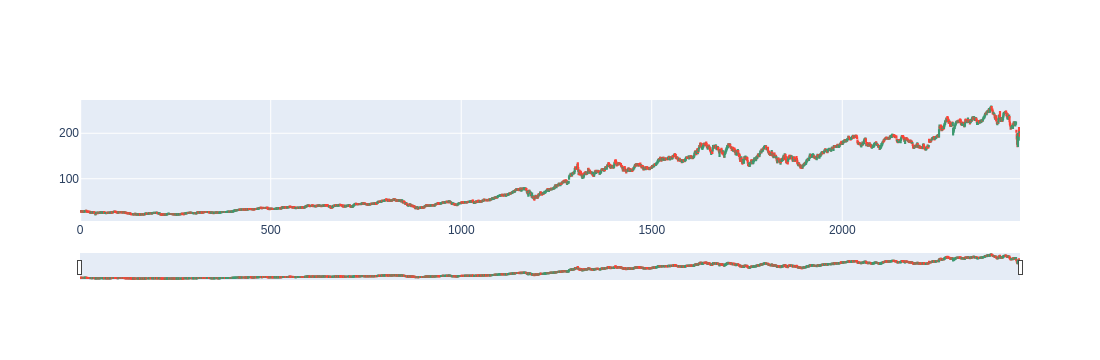

In [24]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick( open=apple_data['Open'],high = apple_data['High'], low=apple_data['Low'],close= apple_data['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)t
fig.show()

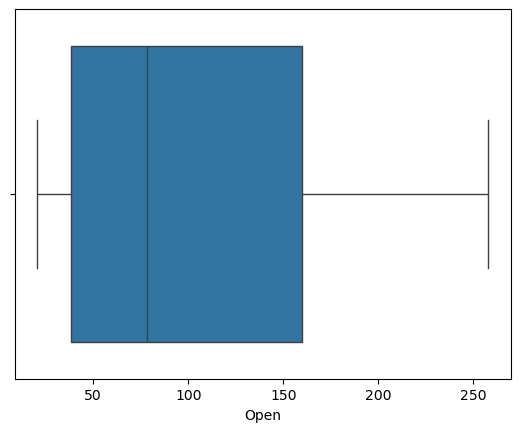

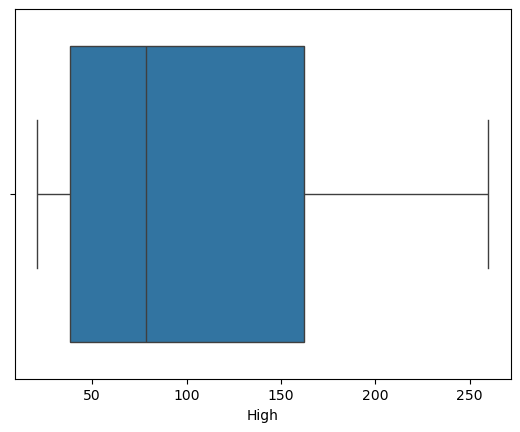

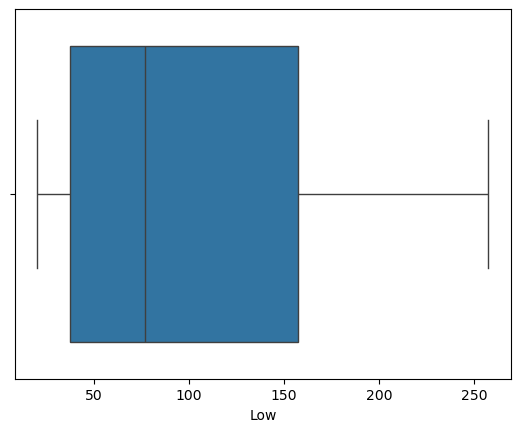

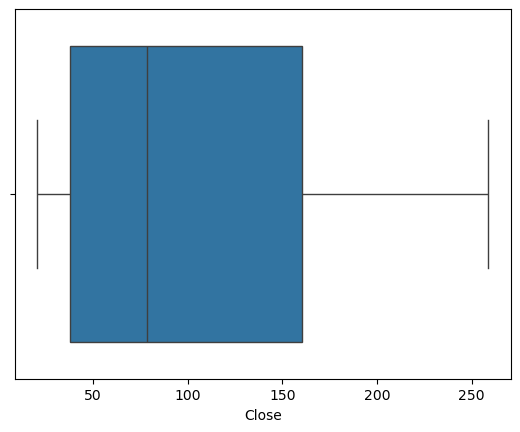

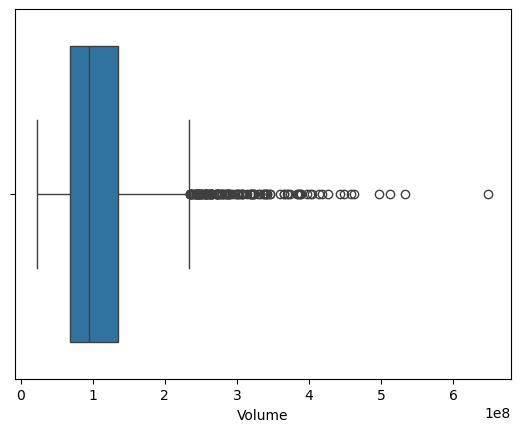

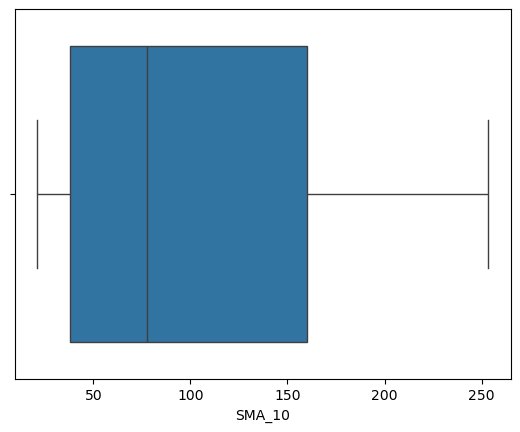

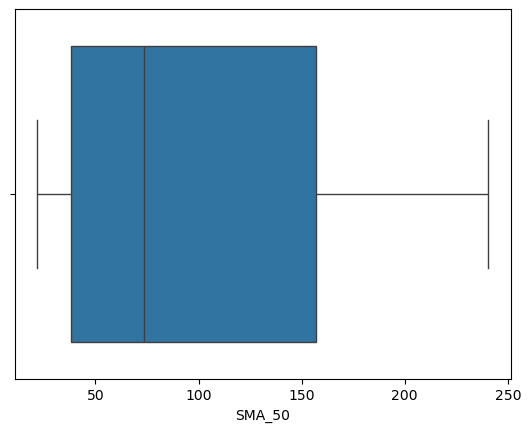

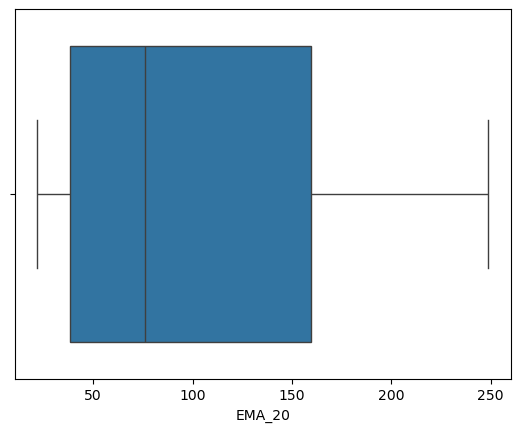

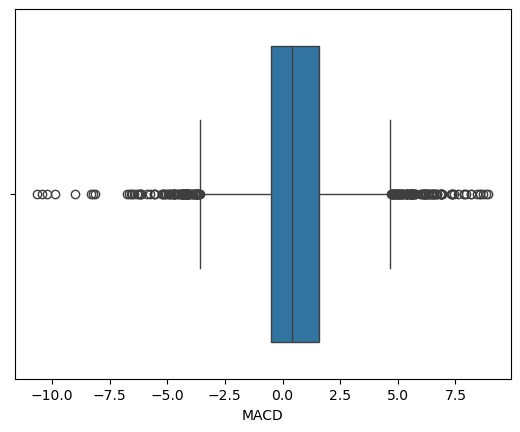

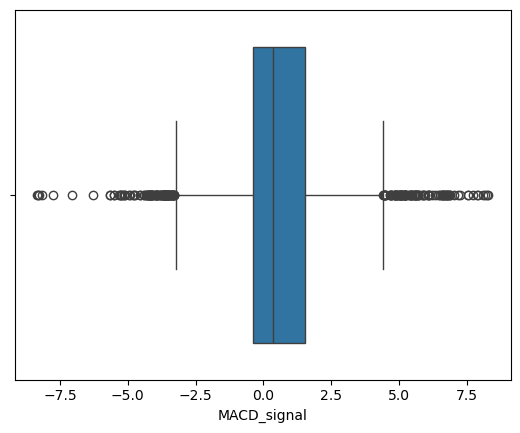

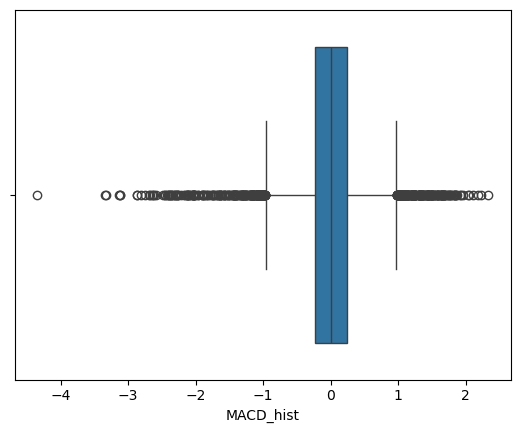

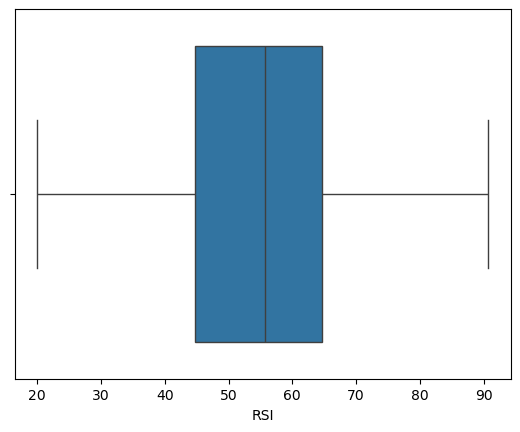

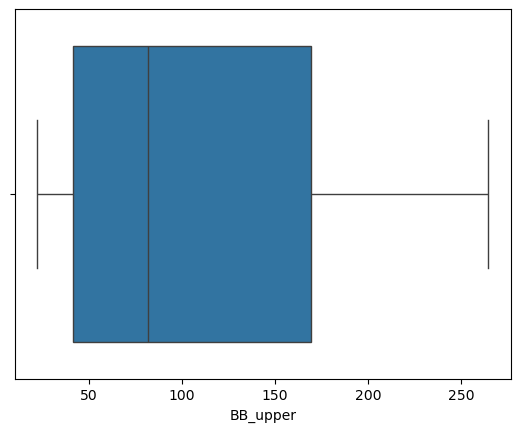

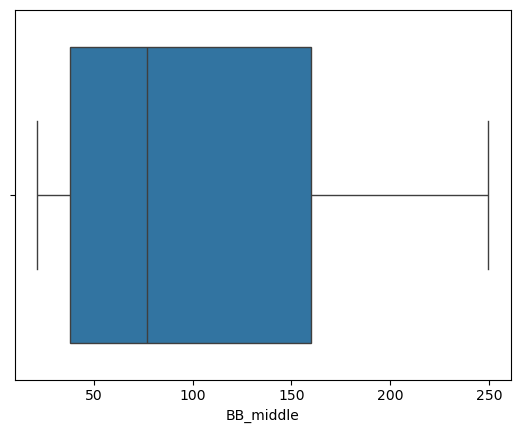

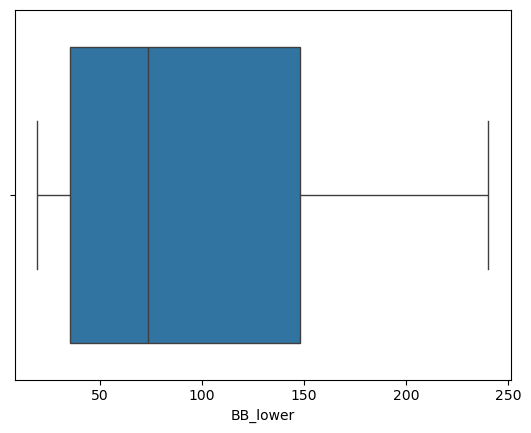

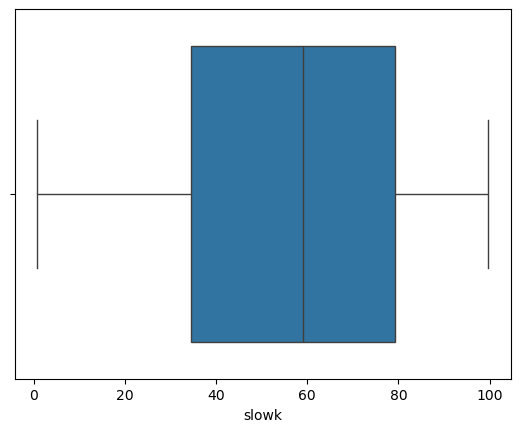

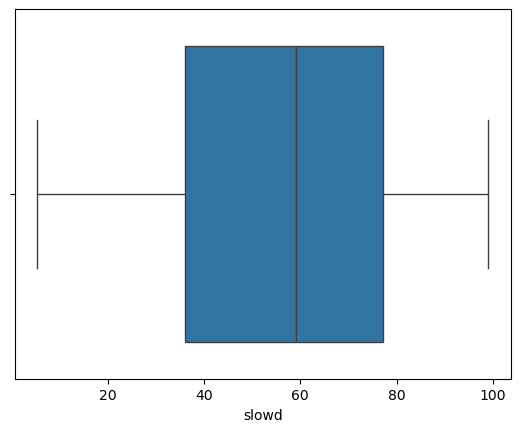

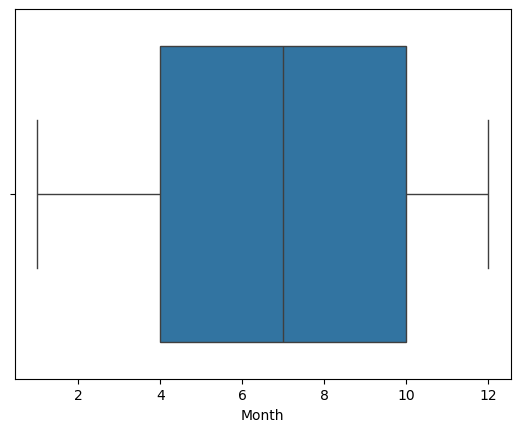

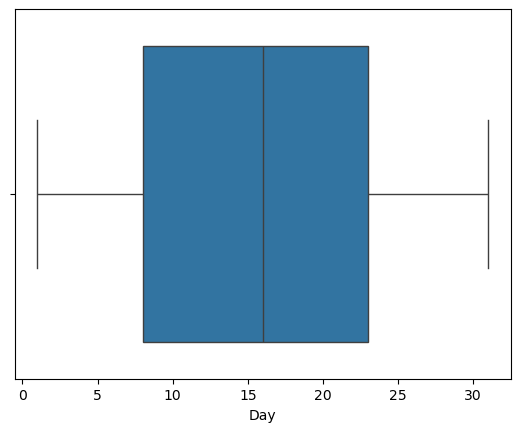

In [25]:
#BOXPLOT TO IDENTIFY THE OUTLIERS
import seaborn as sns
import matplotlib.pyplot as plt
for i in apple_data.select_dtypes(include='number').columns:
        sns.boxplot(data=apple_data, x=i)
        plt.show()

In [1]:
cleaned_data = pd.get_dummies(cleaned_data, columns=['Ticker'])
cleaned_data.head()

In [30]:
cleaned_data.tail()

,Open,High,Low,Close,Volume,SMA_10,SMA_50,EMA_20,MACD,MACD_signal,...,Ticker_AAPL,Ticker_AMZN,Ticker_BRK-B,Ticker_GOOGL,Ticker_JPM,Ticker_META,Ticker_MSFT,Ticker_NVDA,Ticker_TSLA,Ticker_V
25155,328.019989,330.160004,313.269989,324.609985,8709800,331.613998,343.340668,333.753899,-5.307286,-3.126337,...,False,False,False,False,False,False,False,False,False,True
25156,324.429993,336.980011,322.540009,333.399994,6804500,330.668997,343.159194,333.720194,-4.643938,-3.429857,...,False,False,False,False,False,False,False,False,False,True
25157,336.410004,339.609985,333.140015,335.179993,5011800,329.140997,343.038277,333.859222,-3.929305,-3.529746,...,False,False,False,False,False,False,False,False,False,True
25158,336.720001,339.390015,335.000000,335.809998,4386200,328.086996,342.849695,334.045010,-3.274371,-3.478671,...,False,False,False,False,False,False,False,False,False,True
25159,335.000000,337.220001,328.859985,331.329987,5850600,326.586996,342.584891,333.786437,-3.081312,-3.399200,...,False,False,False,False,False,False,False,False,False,True


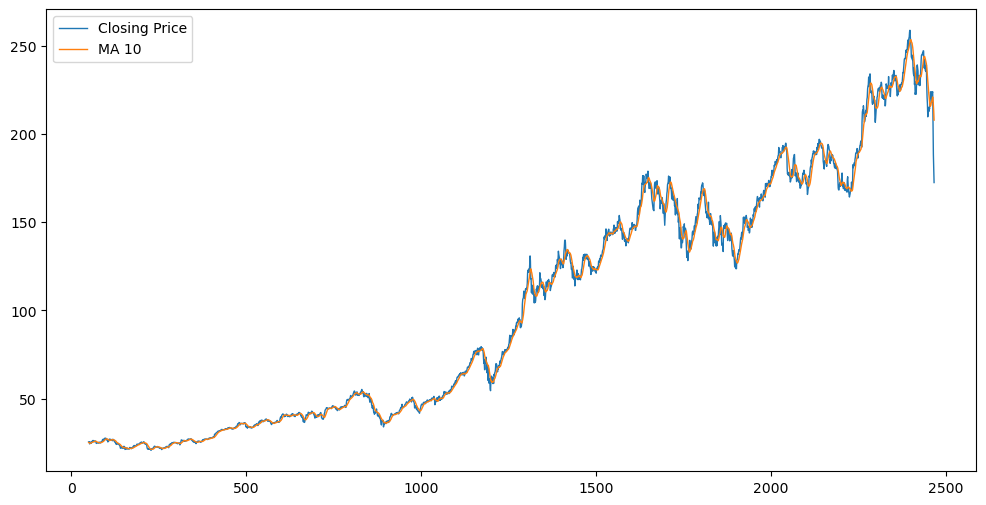

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(apple_data['Close'], label = 'Closing Price', linewidth = 1)
plt.plot(msft['SMA_10'], label = 'SMA 10', linewidth=1)
plt.legend()
plt.show()

In [30]:
#Changing days , months and weakDays into cyclic encoding
import numpy as np

processed_df['Month_sin'] = np.sin(2 * np.pi * processed_df['Month'] / 12)
processed_df['Month_cos'] = np.cos(2 * np.pi * processed_df['Month'] / 12)

processed_df['Day_sin'] = np.sin(2 * np.pi * processed_df['Day'] / 31)
processed_df['Day_cos'] = np.cos(2 * np.pi * processed_df['Day'] / 31)


In [35]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24621 entries, 0 to 24620
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          24621 non-null  float64
 1   High          24621 non-null  float64
 2   Low           24621 non-null  float64
 3   Close         24621 non-null  float64
 4   Volume        24621 non-null  int64  
 5   SMA_10        24621 non-null  float64
 6   SMA_50        24621 non-null  float64
 7   EMA_20        24621 non-null  float64
 8   MACD          24621 non-null  float64
 9   MACD_signal   24621 non-null  float64
 10  MACD_hist     24621 non-null  float64
 11  RSI           24621 non-null  float64
 12  BB_upper      24621 non-null  float64
 13  BB_middle     24621 non-null  float64
 14  BB_lower      24621 non-null  float64
 15  slowk         24621 non-null  float64
 16  slowd         24621 non-null  float64
 17  Ticker_AAPL   24621 non-null  bool   
 18  Ticker_AMZN   24621 non-nu